An ROC curve (receiver operating characteristic curve) a classification model at all classification thresholds. 

This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR)=recall:

$$TPR = \frac{TP} {TP + FN}$$

False Positive Rate (FPR) is defined as follows:

$$FPR = \frac{FP} {FP + TN}$$
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

AUC ("Area under the ROC Curve.") measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC is desirable for the following two reasons:

- scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

Caveats:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). 


AUCROC can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.


On severely imbalanced classification problems.

0.75


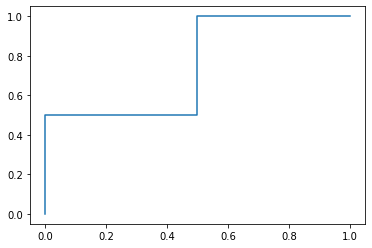

In [2]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
plt.plot(fpr, tpr)
print(roc_auc_score(y, scores))

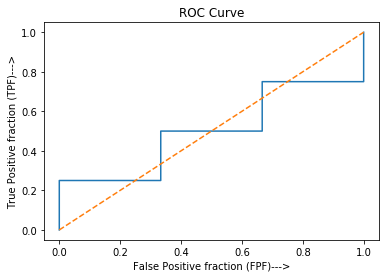

AUC:Area under the ROC curve is 0.4837


In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import trapz

def confusion_metrics(labels,predictions,threshold):
    true_positive=0;
    false_positive=0;
    true_negative=0;
    false_negative=0;
    for i in range(len(labels)):
        if labels[i]==1:
            if predictions[i]>=threshold:
                true_positive+=1
            else:
                false_negative+=1
        else:
            if predictions[i]>=threshold:
                false_positive+=1
            else:
                true_negative+=1
    tpf=true_positive/(true_positive + false_negative)
    fpf=false_positive/(false_positive + true_negative)
    return tpf,fpf

def results(labels,predictions):
    TPF=[]
    FPF=[]
    THRESHOLD=[]
    i=0
    #increemental step size for threshold
    dx_step=0.0002
    while(i<=1):
        threshold=i
        tpf,fpf=confusion_metrics(labels,predictions,threshold)
        TPF.append(tpf)
        FPF.append(fpf)
        THRESHOLD.append(threshold)
        i+=dx_step
        
    plt.plot(FPF,TPF)
    plt.plot(THRESHOLD,THRESHOLD,'--')
    plt.xlabel("False Positive fraction (FPF)--->")
    plt.ylabel("True Positive fraction (TPF)--->")
    plt.title("ROC Curve")
    plt.show()
    area = trapz(TPF, dx=dx_step)
    print("AUC:Area under the ROC curve is", area)
    return
        
labels=[1,0,0,0,1,1,1]
predictions=np.random.uniform(0,1,7)
    
results(labels,predictions)